### Data Pre-processing
We have a 294*22 matrix: row-> number of data; col-> number of factors.
There are 20 features.

In [1]:
# PCA and factor analysis on the depression data
import numpy as np
import pandas as pd

# read the data from .txt
depress_df = pd.read_table("depress.txt", sep = '[\s]+', header = None, index_col = 0, engine = 'python') # engine: mute regex warning
CESD_data = depress_df.iloc[:, 7:29] # C1:C20 + CESD index + Case
CESD_data.columns = range(CESD_data.shape[1]) # reset index
names = list()
for i in range(1,21): # [1,20]
    names.append(str(i))
names.extend(['CESD','CASES'])
CESD_data.columns = names
CESD_data

,1,2,3,4,5,6,7,8,9,10,...,13,14,15,16,17,18,19,20,CESD,CASES
0,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,4,0
3,0,0,0,0,1,0,0,0,0,0,...,0,1,1,1,0,0,0,0,4,0
4,0,0,0,0,1,1,0,3,0,0,...,0,0,0,0,0,0,0,0,5,0
5,0,0,0,0,0,0,0,3,3,0,...,0,0,0,0,0,0,0,0,6,0
6,0,0,0,0,0,0,0,0,1,0,...,2,0,0,2,1,0,0,0,7,0
7,2,1,1,2,1,0,0,2,2,0,...,0,0,3,0,0,0,0,1,15,0
8,0,1,2,0,2,1,0,0,0,0,...,0,0,0,1,1,1,1,0,10,0
9,0,1,1,0,0,3,0,0,0,0,...,0,3,2,3,0,0,0,0,16,1


### Using sklearn Library to do PCA

The variance of PCA factors: 
[ 0.35076544  0.07374202  0.06903844  0.05666768  0.0534861   0.04531248
  0.0432089   0.0410259   0.036529    0.03340531  0.02947972  0.0272064
  0.02576259  0.02217968  0.02013303  0.01757709  0.01603945  0.01589047
  0.01314343  0.00940687]


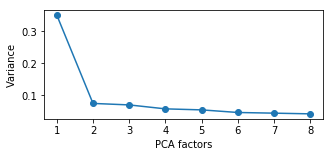

In [2]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

# divide the data set into feature set and label
X = CESD_data.iloc[:,0:20] #feature set
y = CESD_data.iloc[:,21:] # label
# divide the data set into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
y_train = np.ravel(y_train)

# PCA works best with normalized data feature set
scaler = StandardScaler()
X_train_original = scaler.fit_transform(X_train)
X_test_original = scaler.fit_transform(X_test)

# Do PCA (n-factors)
X_train = X_train_original
X_test = X_test_original
pca = PCA() # number of features isn't specified, thus all the 20 fatures will be used
X_train = pca.fit_transform(X_train) # get fitted PCA model
X_test = pca.transform(X_test) # do transformation using the model got above

# analyze the variance
explained_variance = pca.explained_variance_ratio_ 
print("The variance of PCA factors: ")
print(explained_variance)
# draw the variance plot
plt.rcParams["figure.figsize"] = [5,2]
plt.plot([1, 2, 3, 4, 5, 6, 7, 8], explained_variance[:8], "-o")
plt.xlabel("PCA factors")
plt.ylabel("Variance")
plt.show()

### Prediction Performance with different number of features

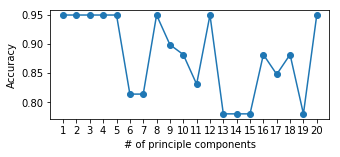

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import accuracy_score

scores = []
for i in range(20):
    X_train = X_train_original
    X_test = X_test_original
    pca = PCA(n_components=i+1)
    X_train = pca.fit_transform(X_train) # get fitted PCA model
    X_test = pca.transform(X_test) # do transformation using the model got above

    # analyze the performance
    classifier = RandomForestClassifier(max_depth=2, random_state=0)  
    classifier.fit(X_train, y_train)

    # Predicting the Test set results
    y_pred = classifier.predict(X_test)
    scores.extend([accuracy_score(y_test, y_pred)])
    
# draw the variance plot
plt.rcParams["figure.figsize"] = [5,2]
plt.plot(range(1,21), scores, "-o")
plt.xticks(range(1,21))
plt.xlabel("# of principle components")
plt.ylabel("Accuracy")
plt.show()

### Performance Analysis using Scatter Chart

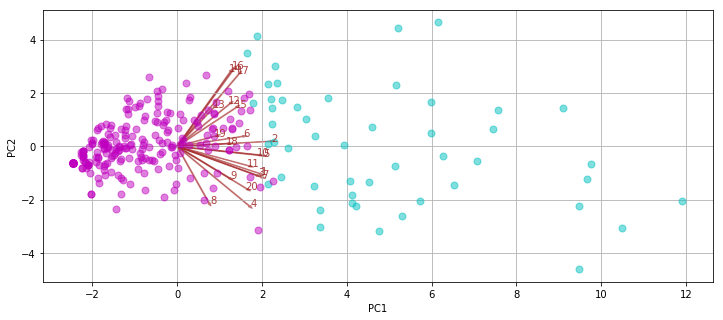

In [4]:
plt.rcParams["figure.figsize"] = [12,5]
# Do PCA and get the first 2 components
X = scaler.fit_transform(X)
pca = PCA()
X_trans = pca.fit_transform(X)

# The first two eigenvectors with greatest variance
x_vector = pca.components_[0] # see 'prcomp(my_data)$rotation' in R
y_vector = pca.components_[1]

# see 'prcomp(my_data)$x' in R
xs = X_trans[:,0] # 1st principle components of the data
ys = X_trans[:,1] # 2st principle components of the data

## visualize projections
# arrow: how much weight each original components plays in the composition of the PCs
for i in range(len(x_vector)):
    plt.arrow(0, 0, x_vector[i]*7, y_vector[i]*7,color = 'brown',alpha = 0.5, width = 0.025)
    plt.text(x_vector[i]*7+0.1, y_vector[i]*7+0.1,
             list(CESD_data.iloc[:,0:21].columns.values)[i],  color = 'brown', ha = 'center', va = 'center', alpha=0.9)

for i in range(len(xs)):
    if (CESD_data.iloc[:,21:].values)[i] == 1:
        plt.plot(xs[i], ys[i], 'o', markersize=7, color= 'c' , alpha=0.5)
    else:
        plt.plot(xs[i], ys[i], 'o', markersize=7, color= 'm' , alpha=0.5)
    
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid()
plt.show()

In [5]:
# Print the eigenvalues(variance of the principle components)
cum_prop = []
for i in range(len(pca.explained_variance_ratio_)):
    if i == 0:
        cum_prop.append(pca.explained_variance_ratio_[i]) 
    else:
        cum_prop.append(cum_prop[i-1] + pca.explained_variance_ratio_[i]) 
        
pca_result2 = pd.DataFrame([pca.explained_variance_, pca.explained_variance_ratio_, cum_prop], columns =['PC{}'.format(i) for i in range(1,21)],
                           index = ['Variance', 'Proportion of Variance','Cumulative Proportion']).T
pca_result2

,Variance,Proportion of Variance,Cumulative Proportion
PC1,7.079498,0.352771,0.352771
PC2,1.490639,0.074278,0.427049
PC3,1.235713,0.061575,0.488625
PC4,1.069322,0.053284,0.541909
PC5,1.016089,0.050632,0.592541
PC6,0.970763,0.048373,0.640914
PC7,0.950048,0.047341,0.688255
PC8,0.771863,0.038462,0.726716
PC9,0.697008,0.034732,0.761448
PC10,0.662380,0.033006,0.794455


## Factor Analysis
https://factor-analyzer.readthedocs.io/en/latest/factor_analyzer.html#module-factor_analyzer.factor_analyzer

In [6]:
from factor_analyzer import FactorAnalyzer # pip install factor_analyzer
fa = FactorAnalyzer()
df_X = pd.DataFrame(X, columns=['x{}'.format(i) for i in range(1,21)])
fa.analyze(df_X, 4, rotation='varimax',method='ml')
fa.loadings

,Factor1,Factor2,Factor3,Factor4
x1,0.449347,0.466590,0.265575,0.234957
x2,0.774790,0.209134,0.292800,0.316481
x3,0.576798,0.377023,0.146870,0.167902
x4,0.394193,0.678773,0.043041,0.064626
x5,0.719947,0.288067,0.167151,0.209864
x6,0.400203,0.315742,-0.046349,0.320633
x7,0.377897,0.539429,0.257968,0.275054
x8,0.012245,0.386862,0.098857,0.041926
x9,0.122950,0.174694,0.737230,0.074152
x10,0.401745,0.304385,0.476239,0.288386


In [7]:
fa.get_factor_variance()

,Factor1,Factor2,Factor3,Factor4
SS Loadings,2.898299,2.230556,1.364824,2.133386
Proportion Var,0.144915,0.111528,0.068241,0.106669
Cumulative Var,0.144915,0.256443,0.324684,0.431353


In [8]:
fa.get_scores(df_X)

,Factor1,Factor2,Factor3,Factor4
0,-0.433960,-0.161805,-0.413433,-0.742554
1,-0.224198,-0.258287,-0.602433,-0.228074
2,-0.107651,-0.393623,-0.543394,-0.176931
3,-0.226252,0.419674,-0.698569,-0.758543
4,-1.118444,0.248869,1.582838,-1.091577
5,-0.820605,-0.380886,0.061926,0.535232
6,0.648981,1.772833,0.302263,-1.426110
7,1.269074,-0.459042,-0.744641,-0.178832
8,0.527504,-0.817888,-1.164697,1.890930
9,-0.433960,-0.161805,-0.413433,-0.742554
